Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [1]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>DESIRED_ACCURACY):
      print("\nReached " + str(DESIRED_ACCURACY*100) + "% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

--2019-07-01 13:32:51--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2019-07-01 13:32:52 (173 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [2]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

model.summary()

W0701 13:32:53.410257 140653054863232 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0701 13:32:53.605217 140653054863232 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [3]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s/', 
        target_size=(150, 150), 
        batch_size=20,
        class_mode='binary')

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [4]:
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(
      train_generator,
      steps_per_epoch=4,  
      epochs=15,
      verbose=1, 
      callbacks=[callbacks])
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/15
4/4 [==============================] - 3s 704ms/step - loss: 5.7320 - acc: 0.4500
Epoch 2/15
4/4 [==============================] - 2s 492ms/step - loss: 0.6707 - acc: 0.5750
Epoch 3/15
4/4 [==============================] - 2s 490ms/step - loss: 0.5883 - acc: 0.7250
Epoch 4/15
4/4 [==============================] - 2s 490ms/step - loss: 0.3537 - acc: 0.8750
Epoch 5/15
4/4 [==============================] - 2s 497ms/step - loss: 0.3303 - acc: 0.9000
Epoch 6/15
4/4 [==============================] - 2s 493ms/step - loss: 0.2513 - acc: 0.9000
Epoch 7/15
4/4 [==============================] - 2s 491ms/step - loss: 0.0934 - acc: 0.9875
Epoch 8/15
4/4 [==============================] - 2s 494ms/step - loss: 0.1135 - acc: 0.9375
Epoch 9/15
3/4 [=====================>........] - ETA: 0s - loss: 0.0421 - acc: 1.0000
Reached 99.9% accuracy so cancelling training!
4/4 [==============================] - 2s 492ms/step - loss: 0.0448 - acc: 1.0000


In [4]:
train_horse_names = os.listdir("/tmp/h-or-s/sad")
print(train_horse_names[:10])

['sad1-12.png', 'sad2-18.png', 'sad2-02.png', 'sad1-06.png', 'sad1-11.png', 'sad1-13.png', 'sad2-14.png', 'sad2-12.png', 'sad2-10.png', 'sad2-05.png']


In [7]:
from PIL import Image
jpgfile = Image. open("/tmp/h-or-s/sad/sad2-18.png")
print(jpgfile. size, jpgfile. format)

(150, 150) PNG


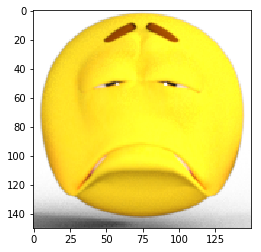

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("/tmp/h-or-s/sad/sad2-18.png")
plt.imshow(img)

plt.show()